In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ct_support_code import *
data = np.load('ct_data.npz')
X_train = data['X_train']; X_val = data['X_val']; X_test = data['X_test']
y_train = data['y_train']; y_val = data['y_val']; y_test = data['y_test']

In [2]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_val))
print(np.shape(y_val))
print(np.shape(X_test))
print(np.shape(y_test))

(40754, 384)
(40754,)
(5785, 384)
(5785,)
(6961, 384)
(6961,)


In [3]:
# a
mean_y_train = np.mean(y_train)
print('mean of y_train is:',mean_y_train)
se_y_train = np.std(y_train,ddof=1)/np.sqrt(np.shape(y_train)[0])
print('corresponding standard error is:',se_y_train)
mean_y_val = np.mean(y_val)
print('mean of y_val is:',mean_y_val)
se_y_val = np.std(y_val,ddof=1)/np.sqrt(np.shape(y_val)[0])
print('corresponding standard error is:',se_y_val)
mean_y_train_5785 = np.mean(y_train[0:np.shape(y_val)[0]])
print('mean of first 5785 y_train is:',mean_y_train_5785)
se_y_train_5785 = np.std(y_train[0:np.shape(y_val)[0]],ddof=1)/np.sqrt(np.shape(y_val)[0])
print('corresponding standard error is:',se_y_train_5785)

# mean of y_train is: -9.13868774539957e-15
# corresponding standard error is: 0.0049535309340638205
# mean of y_val is: -0.2160085093241599
# corresponding standard error is: 0.01290449880016868
# mean of first 5785 y_train is: -0.44247687859693674
# corresponding standard error is: 0.011927303389170828

# for y_train, since sample size is large, its standard error is small, so that the sample mean is closer to population mean 0
# while for y_val and first 5785 y_train, with smaller sample size, there standard errors are rather higher, leading some bias on sample mean from populaiton mean 0

mean of y_train is: -9.13868774539957e-15
corresponding standard error is: 0.0049535309340638205
mean of y_val is: -0.2160085093241599
corresponding standard error is: 0.01290449880016868
mean of first 5785 y_train is: -0.44247687859693674
corresponding standard error is: 0.011927303389170828


In [4]:
print(y_train[0:1])
print('1',np.shape(y_val)[0])

[-1.12519785]
1 5785


In [5]:
print(X_train[0:10,0:10])
print(np.all(X_train[0:10,0]==X_train[0:10,1]))
print(np.all(X_train[0:10,5]==X_train[0:10,6]))
tmp=np.array([True,False,True])
print(np.all(tmp))
print(np.shape(X_train)[0])
print(np.shape(X_train)[1])
tmp1=np.array([[1,2,3],[4,5,3]])
print(tmp1)
tmp2=np.delete(tmp1,2,axis=1)
print(tmp2)
tmp3=np.delete(tmp1,0,axis=1)
print(tmp3)
tmp4=[]
i=1
j=2
tmp4.append(i)
tmp4.append(j)
print(tmp4)
tmp5=np.array([False,False,False])
print(np.all(tmp5))
tmp6=np.array([1,2,3])
print(np.all(tmp6==tmp6[1]))
tmp7=np.array([1,1,1])
print(np.all(tmp7==tmp7[1]))
print(np.all(tmp1[:,0]==[1,4]))
print(np.zeros(2))
print([1]*3)
print([tmp1[0,2]]*2)
print(np.all(tmp1[:,2]==[tmp1[0,2]]*2))
print(np.all(tmp1[:,1]==2))
print([1] in tmp6)
print([4] in tmp6)

[[ 0.    0.    0.    0.    0.    0.   -0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.    0.   -0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.    0.   -0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.    0.   -0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.    0.   -0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.    0.   -0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.    0.   -0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.    0.   -0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.    0.   -0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.    0.   -0.25 -0.25 -0.25 -0.25]]
True
False
False
40754
384
[[1 2 3]
 [4 5 3]]
[[1 2]
 [4 5]]
[[2 3]
 [5 3]]
[1, 2]
False
False
True
True
[0. 0.]
[1, 1, 1]
[3, 3]
True
False
True
False


In [4]:
# b
# delete constant columns
deleted_constant_column = []
for i in range(0,np.shape(X_train)[1]):
    if(np.all(X_train[:,i]==X_train[0,i])):
        deleted_constant_column.append(i)
X_train=np.delete(X_train,deleted_constant_column,axis=1)
print('deleted constant columns are:',deleted_constant_column)

# delete duplicate columns
deleted_duplicate_column = []
for i in range(0,np.shape(X_train)[1]-1):
    for j in range(i+1,np.shape(X_train)[1]):
        if((j in deleted_duplicate_column)==False and np.all(X_train[:,i]==X_train[:,j])):
            deleted_duplicate_column.append(j)
X_train=np.delete(X_train,deleted_duplicate_column,axis=1)
print('deleted duplicate columns after constant columns delected are:',deleted_duplicate_column)

# delete constant columns in validation set and test set
X_val=np.delete(X_val,deleted_constant_column,axis=1)
X_test=np.delete(X_test,deleted_constant_column,axis=1)

# delete duplicate columns in validation set and test set
X_val=np.delete(X_val,deleted_duplicate_column,axis=1)
X_test=np.delete(X_test,deleted_duplicate_column,axis=1)

# deleted constant columns are: [59, 69, 179, 189, 351]
# deleted duplicate columns after constant columns delected are: [76, 77, 195, 185, 283, 354]

deleted constant columns are: [59, 69, 179, 189, 351]
deleted duplicate columns after constant columns delected are: [76, 77, 195, 185, 283, 354]


In [29]:
print(np.shape(X_val))
print(np.shape(X_test))

(5785, 373)
(6961, 373)


In [7]:
def xx_preprocessing(X):
    X_bias = np.concatenate([X, np.ones((X.shape[0],1))], axis=1)
    rg = np.concatenate([np.eye(X.shape[1])*alpha, np.zeros((X.shape[1],1))], axis=1)
    x = np.concatenate([X_bias, rg], axis=0)
    return x
def yy_preprocessing(X,yy):
    y = np.concatenate([yy, np.zeros((X.shape[1],1))], axis=0)
    return y

In [9]:
print(np.shape(X_train))
X_bias = np.concatenate([X_train, np.ones((X_train.shape[0],1))], axis=1)
print(np.shape(X_bias))
print(np.eye(3)*2)
#alpha=30
print(X_train.shape[1])
rg = np.eye(X_train.shape[1])*alpha
tmp_x=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
tmp_y=np.array([[1],[2],[3],[4]])
print(np.shape(tmp_y))
print(xx_preprocessing(tmp_x))
print(yy_preprocessing(tmp_x,tmp_y))
#fit_linreg(X=xx_preprocessing(tmp_x), yy=yy_preprocessing(tmp_x,tmp_y), alpha=30)
#w_fit = np.linalg.lstsq(X, yy, rcond=None)[0]
#y_train_lr = 
#w_fit = w_fit.ravel()

(40754, 373)
(40754, 374)
[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
373
(4, 1)
[[ 1.  2.  3.  1.]
 [ 4.  5.  6.  1.]
 [ 7.  8.  9.  1.]
 [10. 11. 12.  1.]
 [30.  0.  0.  0.]
 [ 0. 30.  0.  0.]
 [ 0.  0. 30.  0.]]
[[1.]
 [2.]
 [3.]
 [4.]
 [0.]
 [0.]
 [0.]]


In [6]:
# c
def fit_linreg(X, yy, alpha):
    X_bias = np.concatenate([X, np.ones((X.shape[0],1))], axis=1)
    rg = np.concatenate([np.eye(X.shape[1])*np.sqrt(alpha), np.zeros((X.shape[1],1))], axis=1)
    x = np.concatenate([X_bias, rg], axis=0)
    y = np.concatenate([np.array([yy]).T, np.zeros((X.shape[1],1))], axis=0)
    w_fit = np.linalg.lstsq(x, y, rcond=None)[0]
    return w_fit

w_fit_lr = fit_linreg(X=X_train, yy=y_train, alpha=30)

w_fit_gd1,w_fit_gd2 = fit_linreg_gradopt(X=X_train, yy=y_train, alpha=30)

# preprocessing the estimate output from fit_linreg_gradopt
def w_combine(w_x, w_c):
    w = np.zeros((w_x.shape[0]+1,1))
    w[0:w_x.shape[0]] = np.array([w_x]).T
    w[w_x.shape[0]] = np.array([[w_c]])
    return w

w_fit_gd = w_combine(w_x=w_fit_gd1,w_c=w_fit_gd2)

def predict(X, w):
    X_bias = np.concatenate([X, np.ones((X.shape[0],1))], axis=1)
    y_hat = np.dot(X_bias,w)
    return y_hat

def rmse_compute(X, yy, w):
    n = yy.shape[0]
    y_hat = predict(X, w)
    rmse = np.sqrt(np.sum((np.array([yy]).T-y_hat)**2)/n)
    return rmse

# compare RMSE
rmse_lr_train = rmse_compute(X=X_train, yy=y_train, w=w_fit_lr)
print('RMSE on training set by fit_linreg is:',rmse_lr_train)
rmse_gd_train = rmse_compute(X=X_train, yy=y_train, w=w_fit_gd)
print('RMSE on training set by fit_linreg_gradopt is:',rmse_gd_train)
rmse_lr_val = rmse_compute(X=X_val, yy=y_val, w=w_fit_lr)
print('RMSE on validation set by fit_linreg is:',rmse_lr_val)
rmse_gd_val = rmse_compute(X=X_val, yy=y_val, w=w_fit_gd)
print('RMSE on validation set by fit_linreg_gradopt is:',rmse_gd_val)

# RMSE on training set by fit_linreg is: 0.3567565397204055
# RMSE on training set by fit_linreg_gradopt is: 0.3567552912135179
# RMSE on validation set by fit_linreg is: 0.4230521968394694
# RMSE on validation set by fit_linreg_gradopt is: 0.4230626605868067

RMSE on training set by fit_linreg is: 0.3567565397204055
RMSE on training set by fit_linreg_gradopt is: 0.3567552912135179
RMSE on validation set by fit_linreg is: 0.4230521968394694
RMSE on validation set by fit_linreg_gradopt is: 0.4230626605868067


In [36]:
print(np.shape(w_fit_lr))
print(np.shape(w_fit_gd))
print(np.shape(np.array([y_train]).T))

(374, 1)
(374, 1)
(40754, 1)


In [215]:
a=np.array([1,2,3])
b=np.array([4,5,6])
(a-b)**2

array([9, 9, 9], dtype=int32)

In [16]:
# d
def fit_logreg_gradopt(X, yy, alpha):
    D = X.shape[1]
    args = (X, yy, alpha)
    init = (np.zeros(D), np.array(0))
    ww, bb = minimize_list(logreg_cost, init, args)
    return ww, bb

def sigmoid(X):
    sg = np.divide(1,(1+np.exp(-X)))
    return sg

K = 20 # number of thresholded classification problems to fit
N = X_train.shape[1]
X_train_prob = np.zeros(shape=(X_train.shape[0],K))
X_val_prob = np.zeros(shape=(X_val.shape[0],K))
mx = np.max(y_train); mn = np.min(y_train); hh = (mx-mn)/(K+1)
thresholds = np.linspace(mn+hh, mx-hh, num=K, endpoint=True)

# record the initial parameters that will be used in the next problem
ww_q3_init = np.zeros(shape=(K))
bb_q3_init = 0
V_q3_init = np.zeros(shape=(K,N))
bk_q3_init = np.zeros(shape=(K))

# iteration for K=20
for kk in range(K):
    labels = y_train > thresholds[kk]
    # ... fit logistic regression to these labels
    w_fit_log_gd1,w_fit_log_gd2 = fit_logreg_gradopt(X=X_train, yy=labels, alpha=30)
    w_fit_log_gd = w_combine(w_x=w_fit_log_gd1,w_c=w_fit_log_gd2)
    X_train_prob[:,kk] = sigmoid(predict(X_train, w_fit_log_gd).ravel())
    X_val_prob[:,kk] = sigmoid(predict(X_val, w_fit_log_gd).ravel())
    # record the initial parameters that will be used in the next problem
    V_q3_init[kk,:] = w_fit_log_gd1
    bk_q3_init[kk] = w_fit_log_gd2

# fit
w_log_lr = fit_linreg(X=X_train_prob, yy=y_train, alpha=30)
# record the initial parameters that will be used in the next problem
ww_q3_init = w_log_lr[0:-1].ravel()
bb_q3_init = w_log_lr[-1]

# predict and compute RMSE
rmse_log_lr_train = rmse_compute(X=X_train_prob, yy=y_train, w=w_log_lr)
print('RMSE on logistic probability training set by fit_linreg is:',rmse_log_lr_train)
rmse_log_lr_val = rmse_compute(X=X_val_prob, yy=y_val, w=w_log_lr)
print('RMSE on logistic probability training set by fit_linreg is:',rmse_log_lr_val)

# RMSE on logistic probability training set by fit_linreg is: 0.1544115042988901
# RMSE on logistic probability training set by fit_linreg is: 0.2542477297775173

RMSE on logistic probability training set by fit_linreg is: 0.1544115042988901
RMSE on logistic probability training set by fit_linreg is: 0.2542477297775173


In [21]:
np.shape(w_fit_log_gd)
w_fit_log_gd1.shape[0]

373

In [11]:
print(np.shape(np.array(predict(X_train, w_fit_log_gd))))
print(np.shape(X_train_prob[:,kk]))
print(np.shape(predict(X_train, w_fit_log_gd)))
print(np.shape(np.zeros(shape=(K))))
tmpneg1=np.array([1,2,3,4,5,6])
print(tmpneg1[-1])
print(tmpneg1[0:-1])
print(tmpneg1[0:6])
print(X_train.shape[1])
print(np.shape(X_train_prob))
print(np.shape(ww_q3_init))
print(np.shape(bb_q3_init))
print(np.shape(V_q3_init))
print(np.shape(bk_q3_init))

(40754, 1)
(40754,)
(40754, 1)
(20,)
6
[1 2 3 4 5]
[1 2 3 4 5 6]
373
(40754, 20)
(20,)
(1,)
(20, 373)
(20,)


In [60]:
# e
def fit_nn(X, yy, alpha, K, ww0=None, bb0=None, V0=None, bk0=None):
    D = X.shape[1]
    args = (X, yy, alpha)
    # just for comparing reason in the following questions, we set the same random initialization using seed()
    if ww0 is None:
        np.random.seed(400)
        ww_init = 0.1*np.random.randn(K)/np.sqrt(K)
    else:
        ww_init = ww0
    if bb0 is None:
        np.random.seed(300)
        bb_init = 0.1*np.random.randn(1)/np.sqrt(K)
    else:
        bb_init = bb0
    if V0 is None:
        np.random.seed(200)
        V_init = 0.1*np.random.randn(K,D)/np.sqrt(D)
    else:
        V_init = V0
    if bk0 is None:
        np.random.seed(100)
        bk_init = 0.1*np.random.randn(K)/np.sqrt(D)
    else:
        bk_init = bk0
    init = (ww_init, bb_init, V_init, bk_init)
    ww, bb, V, bk = minimize_list(nn_cost, init, args)
    return ww, bb, V, bk

# fit
params_rd = fit_nn(X=X_train, yy=y_train, alpha=30, K=20)
params_q3 = fit_nn(X=X_train, yy=y_train, alpha=30, K=20, ww0=ww_q3_init, bb0=bb_q3_init, V0=V_q3_init, bk0=bk_q3_init)

# predict and compute RMSE under neural network framework
def rmse_compute_nn(X, yy, params):
    n = yy.shape[0]
    y_hat = nn_cost(params, X)
    rmse = np.sqrt(np.sum((yy-y_hat)**2)/n)
    return rmse

# output and compare RMSE
rmse_nn_rd_train = rmse_compute_nn(X=X_train, yy=y_train, params=params_rd)
print('RMSE on training set by neural network with random initialization is:',rmse_nn_rd_train)
rmse_nn_q3_train = rmse_compute_nn(X=X_train, yy=y_train, params=params_q3)
print('RMSE on training set by neural network with initialization from Q3 is:',rmse_nn_q3_train)
rmse_nn_rd_val = rmse_compute_nn(X=X_val, yy=y_val, params=params_rd)
print('RMSE on validation set by neural network with random initialization is:',rmse_nn_rd_val)
rmse_nn_q3_val = rmse_compute_nn(X=X_val, yy=y_val, params=params_q3)
print('RMSE on validation set by neural network with initialization from Q3 is:',rmse_nn_q3_val)

# RMSE on training set by neural network with random initialization is: 0.14495698828371573
# RMSE on training set by neural network with initialization from Q3 is: 0.13964661059373618
# RMSE on validation set by neural network with random initialization is: 0.27736179585093423
# RMSE on validation set by neural network with initialization from Q3 is: 0.2678848469412657
# As for initialization strategy, the one with results from Q3 works slightly better than random initialization.
# While compared with model in Q3, we find that the neural network performs better on training set but worse on initialization set

RMSE on training set by neural network with random initialization is: 0.14495698828371573
RMSE on training set by neural network with initialization from Q3 is: 0.13964661059373618
RMSE on validation set by neural network with random initialization is: 0.27736179585093423
RMSE on validation set by neural network with initialization from Q3 is: 0.2678848469412657


In [53]:
np.random.seed(100)
ww_init = 0.1*np.random.randn(20)
ww_init

array([-0.17497655,  0.03426804,  0.11530358, -0.0252436 ,  0.09813208,
        0.05142188,  0.02211797, -0.10700433, -0.01894958,  0.02550014,
       -0.0458027 ,  0.04351635, -0.05835951,  0.08168471,  0.06727208,
       -0.01044111, -0.05312804,  0.10297327, -0.04381356, -0.11183182])

In [28]:
#w_fit_log_gd = w_combine(w_x=w_fit_log_gd1,w_c=w_fit_log_gd2)
rmse_nn_rd_train_10 = 0
rmse_nn_rd_val_10 = 0
for i in range(10):
    params_rd_10 = fit_nn(X=X_train, yy=y_train, alpha=30, K=20)
    rmse_nn_rd_train_10 = rmse_nn_rd_train_10+rmse_compute_nn(X=X_train, yy=y_train, params=params_rd_10)
    rmse_nn_rd_val_10 = rmse_nn_rd_val_10+rmse_compute_nn(X=X_val, yy=y_val, params=params_rd_10)
rmse_nn_rd_train_10 = rmse_nn_rd_train_10/10
rmse_nn_rd_val_10 = rmse_nn_rd_val_10/10
print('RMSE on training set by neural network with random initialization for 10 trials average is:',rmse_nn_rd_train_10)
print('RMSE on validation set by neural network with random initialization for 10 trials average is:',rmse_nn_rd_val_10)
#nn_cost(params, X)
#RMSE on logistic probability training set by fit_linreg is: 0.1604188075136425
#RMSE on logistic probability training set by fit_linreg is: 0.25227247507537426

RMSE on training set by neural network with random initialization is: 0.0007168954265953701
RMSE on training set by neural network with initialization from Q3 is: 0.000688797717556736
RMSE on validation set by neural network with random initialization is: 0.0035324094652553315
RMSE on validation set by neural network with initialization from Q3 is: 0.003551373731332015


In [20]:
print(np.shape(nn_cost(params=params_rd, X=X_train[0:100,:])))
print(np.shape(np.array([y_train[0:100]]).T))
print(np.shape(y_train[0:100]))

(100,)
(100, 1)
(100,)


[ 0.23901655  0.20952115  0.16393735  0.15589317  0.19879556  0.21220256
  0.34090973  0.29532593  0.30873292  0.24974213  0.18806998  0.17466294
  0.34359114  0.15857458  0.21488397  0.32750273  0.31945851  0.25510495
  0.23097237  0.33018414  0.29264452  0.25778636  0.25242354  0.13712336
  0.31141433  0.30605152  0.18538857  0.33554691  0.23633514  0.23365373
  0.21756533  0.19611416  0.17734435  0.35699813  0.34895391  0.37576794
  0.24706072  0.38113071  0.32482133  0.30337015  0.24437936  0.22560955
  0.18002575  0.35431672  0.30068875  0.28728175  0.26851194  0.17198158
  0.26583053  0.31409574  0.22024674  0.20683974  0.22292814  0.37040512
  0.35967954  0.33286555  0.28460034  0.16125594  0.43744009  0.3784493
  0.26046776  0.27923753  0.27119335  0.20147697  0.37308653  0.27655612
  0.36504231  0.26314913  0.29800734  0.27387476  0.36772372  0.31677715
  0.3623609   0.20415833  0.3918563  -1.12045298 -1.11777158 -1.05878078
 -1.10704599 -1.10168317 -1.11240876 -1.11509017 -1.

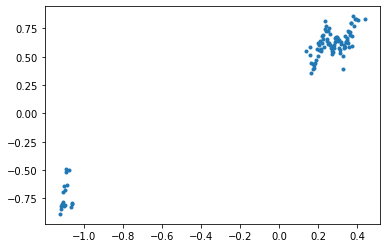

In [31]:
#print(ww_rd)
#print(bb_rd)
#print(V_rd)
#print(bk_rd)
print(y_val[0:100])
print(nn_cost(params=params_rd, X=X_val[0:100,:]))
plt.clf()
plt.plot(y_val[0:100],nn_cost(params=params_rd, X=X_val[0:100,:]),".")
plt.show()

In [119]:
from scipy import stats

def probimprov(rmse_3, baseline, alpha_n, alpha_range):
    yn = np.log(baseline)-np.log(rmse_3)
    ymax = np.max(yn)
    X_rest = list(alpha_range)
    for i in range(alpha_n.shape(0)):
        X_rest.remove(alpha_3[i])
    X_rest = np.array(X_rest)
    post_mean, post_cov = gp_post_par(X_rest=X_rest, X_obs=alpha_3, yy=yn)
    post_std = np.sqrt(np.diag(post_cov))
    pi = stats.norm.cdf(np.divide((post_mean-ymax),post_std))
    return pi, X_rest

pi, X_rest = probimprov(rmse_3=rmse_3, baseline=rmse_nn_rd_val, alpha_3=alpha_3, alpha_range=np.arange(0, 50, 0.02))
#post_mean, post_cov = probimprov(rmse_3=rmse_3, baseline=rmse_nn_rd_val, alpha_3=alpha_3, alpha_range=np.arange(0, 50, 0.02))
#print(post_mean)
#print(np.shape(pi))
#print(pi)
#print(max(pi))
x=np.argmax(pi)
print(x)

#print(rmse_3-rmse_nn_rd_val)

#gp_post_par(X_rest, X_obs, yy)

584


In [152]:
np.shape(np.array(alpha_n).ravel())

(2,)

In [21]:
y=0
print(y)
y=np.array([y])
print(y)
print(y[0])

0
[0]
0


In [23]:
#pi = probimprov(rmse_n=rmse_3, baseline=rmse_nn_rd_val, alpha_n=alpha_3, a_n=3, X_rest=np.arange(0, 50, 0.02))
#print(pi)
#x=np.arange(0, 50, 0.02)
#print(np.shape(np.array(x)))
#print(np.shape(np.array(alpha_3)))
#x1=list(x)
#x2=list(alpha_3)
#print(np.shape(np.array(x1)))
#print(np.shape(np.array(x2)))
print(rmse_n)
print(alpha_n)
print(a_n)
print(np.shape(alpha_n))
print(np.shape(X_rest))
pi = probimprov(rmse_n=rmse_n, baseline=rmse_nn_rd_val, alpha_n=np.array(alpha_n).ravel(), a_n=a_n, X_rest=X_rest)
print(pi)
#return rmse_n,alpha_n,a_n,X_rest
#rmse_n,alpha_n,a_n,X_rest = bayesian_alpha_opt(alpha_range=alpha_range, a_n=a_n, iteration=iteration)
#alpha_n.append(list(alpha_pick))

[0.2734248988845852, 0.2715194856339719, 0.27528342783056226]
[37.44, 31.580000000000002, 32.08]
3
(3,)
(2497,)
[0.05405095 0.05405095 0.05405095 ... 0.05567352 0.05565787 0.05564233]


In [66]:
# f
from scipy import stats

# return neural network RMSE_val by a given alpha
def train_nn_reg(alpha):
    params = fit_nn(X=X_train, yy=y_train, alpha=alpha, K=20)
    rmse_nn_rd_val = rmse_compute_nn(X=X_val, yy=y_val, params=params)
    return rmse_nn_rd_val

# acquisition function
def probimprov(rmse_n, baseline, alpha_n, X_rest):
    yn = np.log(baseline)-np.log(rmse_n)
    ymax = np.max(yn)
    post_mean, post_cov = gp_post_par(X_rest=np.array(X_rest), X_obs=np.array(alpha_n), yy=yn)
    post_std = np.sqrt(np.diag(post_cov))
    pi = stats.norm.cdf(np.divide((post_mean-ymax),post_std))
    return pi

# optimize alpha in iteration
def bayesian_alpha_opt(alpha_range, a_n, iteration):
    alpha_n = []
    rmse_n = []
    X_rest = list(alpha_range)
    for i in range(a_n):
        np.random.seed()
        alpha_pick = np.random.choice(list(alpha_range), 1, replace=False)
        print(alpha_pick)
        alpha_n.append(alpha_pick[0])
        X_rest.remove(alpha_pick[0])
        rmse_n.append(train_nn_reg(alpha=alpha_pick))
    for i in range(iteration):
        pi = probimprov(rmse_n=rmse_n, baseline=rmse_nn_rd_val, alpha_n=np.array(alpha_n).ravel(), X_rest=X_rest)
        index_nplus1 = np.argmax(pi)
        alpha_nplus1 = X_rest[index_nplus1]
        print(alpha_nplus1)
        alpha_n.append(alpha_nplus1)
        a_n = a_n+1
        X_rest.remove(alpha_nplus1)
        rmse_n.append(train_nn_reg(alpha=alpha_nplus1))
    index_opt = np.argmin(rmse_n)
    alpha_opt = alpha_n[index_opt]
    rmse_opt = rmse_n[index_opt]
    return alpha_opt, rmse_opt

a_n = 5
iteration = 7
alpha_range = np.arange(0, 50, 0.02)
alpha_opt, rmse_opt = bayesian_alpha_opt(alpha_range=alpha_range, a_n=a_n, iteration=iteration)
print('After Bayesian optimisation, the optimal alpha is:', alpha_opt, ', with corresponding optimal RMSE_val_a:',rmse_opt)
params = fit_nn(X=X_train, yy=y_train, alpha=alpha_opt, K=20)
rmse_test_a = rmse_compute_nn(X=X_test, yy=y_test, params=params)
print('RMSE_test_a is:',rmse_test_a)
#After Bayesian optimisation, the optimal alpha is: 4.16 , with corresponding optimal RMSE_val_a: 0.24575694603974121
#RMSE_test_a is: 0.2712213928951255
#After Bayesian optimisation, the optimal alpha is: 2.9 , with corresponding optimal RMSE_val_a: 0.24249353747635613
#RMSE_test_a is: 0.2640520595005275

[31.14]
[44.7]
[48.68]
[10.52]
[49.16]
10.84
9.1
12.08
12.26
12.24
12.280000000000001
12.22
After Bayesian optimisation, the optimal alpha is: 12.08 , with corresponding optimal RMSE_val_a: 0.2516389695243346
RMSE_test_a is: 0.2824027477387918


In [38]:
tmp3 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(np.diag(tmp3))
tmp4=np.array([1,2,3,4,5])
print(np.argmax(tmp4))
print(tmp4[4])
# After Bayesian optimisation, the optimal alpha is: 11.8 , with corresponding optimal RMSE_val_a: 0.2443455580795231
# After Bayesian optimisation, the optimal alpha is: 14.8 , with corresponding optimal RMSE_val_a: 0.2542724999123373
print(alpha_range)

[1 5 9]
4
5
[0.000e+00 2.000e-02 4.000e-02 ... 4.994e+01 4.996e+01 4.998e+01]


NameError: name 'alpha_pick' is not defined

In [ ]:
params = fit_nn(X=X_train, yy=y_train, alpha=alpha_opt, K=20)
rmse_test_a = rmse_compute_nn(X=X_test, yy=y_test, params=params)
print('RMSE_test_a is:',rmse_test_a)
params = fit_nn(X=X_train, yy=y_train, alpha=alpha_opt, K=20)
rmse_test_a = rmse_compute_nn(X=X_test, yy=y_test, params=params)
print('RMSE_test_a is:',rmse_test_a)

In [46]:
np.random.seed(2222)
print(np.random.randn())
np.random.seed(2222)
print(np.random.randn())

print(np.random.randn())
print(np.random.randn())

-0.9407914639148472
-0.9407914639148472
1.012953967134065
0.46458471522694583


In [112]:
alpha_range = list(np.arange(0, 10, 1))
print(alpha_range)
alpha_3 = np.random.choice(alpha_range, 3, replace=False)
print(alpha_3)
for i in range(3):
    tmp2 = alpha_range.remove(alpha_3[i])
print(tmp2)
print(alpha_range)
print(alpha_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[8 9 6]
None
[0, 1, 2, 3, 4, 5, 7]
[8 9 6]


In [81]:
# return neural network RMSE_val by a given alpha
def train_nn_reg(alpha):
    params = fit_nn(X=X_train, yy=y_train, alpha=alpha, K=20)
    rmse_nn_rd_val = rmse_compute_nn(X=X_val, yy=y_val, params=params)
    return rmse_nn_rd_val

alpha_range = list(np.arange(0, 50, 0.02))
alpha_3 = np.random.choice(alpha_range, 3, replace=False)

rmse_3 = np.zeros(shape=(3))
for i in range(3):
    rmse_3[i] = train_nn_reg(alpha_3[i])
    
print(rmse_3)

[0.2561773  0.26302672 0.26645656]


In [61]:
X_grid = np.arange(0, 10, 1)[:,None]
N_grid = X_grid.shape[0]
#f_grid = np.dot(L_grid, np.random.randn(N_grid))
print(X_grid)
print(np.random.randn(N_grid))
tmps=list(np.array([1,2,3,4,5,6,7,8,9]))
#np.random.sample(seq=tmps, size=3)
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
np.random.choice(aa_milne_arr, 5)
np.random.choice(tmps, 5, replace=False)
rmse_3 = np.zeros(shape=(3))
print(np.shape(rmse_3))
print(alpha_3)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[-0.88805632 -1.06472892  0.74447972 -0.69620414  0.07720457 -0.72209727
  0.9101895  -0.18604106  1.31101366 -0.48143618]
(3,)
[12.64 49.36 39.98]


In [67]:
alpha = 10000
print(train_nn_reg(10000))

0.27574439466468037


In [65]:
w_fit_gd1,w_fit_gd2 = fit_linreg_gradopt(X=X_train, yy=y_train, alpha=1000)
w_fit_gd = w_combine(w_x=w_fit_gd1,w_c=w_fit_gd2)
rmse_gd_val = rmse_compute(X=X_val, yy=y_val, w=w_fit_gd)
print('RMSE on validation set by fit_linreg_gradopt is:',rmse_gd_val)

RMSE on validation set by fit_linreg_gradopt is: 0.4305067287239561


In [80]:
def nn_cost(params, X, yy=None, alpha=None):
    # Unpack parameters from list
    ww, bb, V, bk = params

    # Forwards computation of cost
    A = np.dot(X, V.T) + bk[None,:] # N,K
    P = 1 / (1 + np.exp(-A)) # N,K
    F = np.dot(P, ww) + bb # N,
    if yy is None:
        # user wants prediction rather than training signal:
        return F
    res = F - yy # N,
    E = np.dot(res, res) + alpha*(np.sum(V*V) + np.dot(ww,ww)) # 1x1

    # Reverse computation of gradients
    F_bar = 2*res # N,
    ww_bar = np.dot(P.T, F_bar) + 2*alpha*ww # K,
    bb_bar = np.sum(F_bar) # scalar
    P_bar = np.dot(F_bar[:,None], ww[None,:]) # N,
    A_bar = P_bar * P * (1 - P) # N,
    V_bar = np.dot(A_bar.T, X) + 2*alpha*V # K,
    bk_bar = np.sum(A_bar, 0)

    return E, (ww_bar, bb_bar, V_bar, bk_bar)

def minimize_list(cost, init_list, args):
    opt = {'maxiter': 500, 'disp': False}
    init, unwrap = params_wrap(init_list)
    def wrap_cost(vec, *args):
        E, params_bar = cost(unwrap(vec), *args)
        vec_bar, _ = params_wrap(params_bar)
        return E, vec_bar
    res = minimize(wrap_cost, init, args, 'L-BFGS-B', jac=True, options=opt)
    return unwrap(res.x)

def fit_nn(X, yy, alpha, K, ww0=None, bb0=None, V0=None, bk0=None):
    D = X.shape[1]
    args = (X, yy, alpha)
    if ww0 is None:
        ww_init = 0.1*np.random.randn(K)/np.sqrt(K)
    else:
        ww_init = ww0
    if bb0 is None:
        bb_init = 0.1*np.random.randn(1)
    else:
        bb_init = bb0
    if V0 is None:
        V_init = 0.1*np.random.randn(K,D)/np.sqrt(K*D)
    else:
        V_init = V0
    if bk0 is None:
        bk_init = 0.1*np.random.randn(K)/np.sqrt(K)
    else:
        bk_init = bk0
    init = (ww_init, bb_init, V_init, bk_init)
    ww, bb, V, bk = minimize_list(nn_cost, init, args)
    return ww, bb, V, bk
def rmse_compute_nn(X, yy, params):
    n = yy.shape[0]
    y_hat = nn_cost(params, X)
    rmse = np.sqrt(np.sum((yy-y_hat)**2)/n)
    return rmse
def train_nn_reg(alpha):
    params = fit_nn(X=X_train, yy=y_train, alpha=alpha, K=20)
    rmse_nn_rd_val = rmse_compute_nn(X=X_val, yy=y_val, params=params)
    return rmse_nn_rd_val
alpha = 10000
print(train_nn_reg(alpha=10000))

0.9203384610945223


In [ ]:
args
def wrap_cost(vec, *args):
        E, params_bar = cost(unwrap(vec), *args)
        vec_bar, _ = params_wrap(params_bar)
        return E, vec_bar

In [65]:
# g1
a_n = 5
iteration = 10
alpha_range = np.arange(0, 50, 0.02)
alpha_opt, rmse_opt = bayesian_alpha_opt(alpha_range=alpha_range, a_n=a_n, iteration=iteration)
print('With increased initial alpha number:',a_n,', and increased iteration number: ',iteration,', after Bayesian optimisation, the optimal alpha is: ', alpha_opt, ', with corresponding optimal RMSE_val_aa: ',rmse_opt)
params = fit_nn(X=X_train, yy=y_train, alpha=alpha_opt, K=20)
rmse_test_aa = rmse_compute_nn(X=X_test, yy=y_test, params=params)
print('RMSE_test_aa is:',rmse_test_aa)

# With increased initial alpha number:  5 and increased iteration number: 10 , after Bayesian optimisation, the optimal alpha is:  5.0200000000000005 , with corresponding optimal RMSE_val_aa:  0.2323119954372763

[27.72]
[27.64]
[45.5]
[30.26]
[10.46]
[13.1]
[20.6]
[34.16]
[11.42]
[36.76]
9.44
8.96
8.98
9.0
8.94
With increased initial alpha number: 10 , and increased iteration number:  5 , after Bayesian optimisation, the optimal alpha is:  9.44 , with corresponding optimal RMSE_val_aa:  0.2502031441711337
RMSE_test_aa is: 0.28523318568832995


In [70]:
# g2
alpha_opt=2.9
# return neural network RMSE_val by a given K under optimal alpha from the previous step
def train_nn_reg_k(K):
    params = fit_nn(X=X_train, yy=y_train, alpha=alpha_opt, K=K)
    rmse_nn_rd_val = rmse_compute_nn(X=X_val, yy=y_val, params=params)
    return rmse_nn_rd_val

# acquisition function
def probimprov_k(rmse_n, baseline, k_n, X_rest):
    yn = np.log(baseline)-np.log(rmse_n)
    ymax = np.max(yn)
    post_mean, post_cov = gp_post_par(X_rest=np.array(X_rest), X_obs=np.array(k_n), yy=yn)
    post_std = np.sqrt(np.diag(post_cov))
    pi = stats.norm.cdf(np.divide((post_mean-ymax),post_std))
    return pi

# optimize k in iteration
def bayesian_k_opt(k_range, k0_n, iteration):
    k_n = []
    rmse_n = []
    X_rest = list(k_range)
    for i in range(k0_n):
        np.random.seed()
        k_pick = np.random.choice(list(k_range), 1, replace=False)
        k_n.append(k_pick[0])
        X_rest.remove(k_pick)
        rmse_n.append(train_nn_reg_k(K=int(k_pick)))
    for i in range(iteration):
        pi = probimprov_k(rmse_n=rmse_n, baseline=rmse_nn_rd_val, k_n=np.array(k_n).ravel(), X_rest=X_rest)
        index_nplus1 = np.argmax(pi)
        k_nplus1 = X_rest[index_nplus1]
        k_n.append(k_nplus1)
        k0_n = k0_n+1
        X_rest.remove(k_nplus1)
        rmse_n.append(train_nn_reg_k(K=int(k_nplus1)))
    index_opt = np.argmin(rmse_n)
    k_opt = k_n[index_opt]
    rmse_opt = rmse_n[index_opt]
    return k_opt, rmse_opt

k0_n = 3
iteration = 5
k_range = np.arange(0, 40, 1)
k_opt, rmse_opt = bayesian_k_opt(k_range=k_range, k0_n=k0_n, iteration=iteration)
print('After Bayesian optimisation, under alpha_opt =',alpha_opt,'the optimal k is:',k_opt,', with corresponding optimal RMSE_val_az:',rmse_opt)
params = fit_nn(X=X_train, yy=y_train, alpha=alpha_opt, K=k_opt)
rmse_test_az = rmse_compute_nn(X=X_test, yy=y_test, params=params)
print('RMSE_test_az is:',rmse_test_az)
#After Bayesian optimisation, the optimal alpha is: 2.9 , with corresponding optimal RMSE_val_a: 0.24249353747635613
#RMSE_test_a is: 0.2640520595005275

After Bayesian optimisation, under alpha_opt = 2.9 the optimal k is: 22 , with corresponding optimal RMSE_val_az: 0.2342811823511767
RMSE_test_az is: 0.2733534574343315


In [73]:
params = fit_nn(X=X_train, yy=y_train, alpha=alpha_opt, K=19)
rmse_val_az = rmse_compute_nn(X=X_val, yy=y_val, params=params)
print('RMSE_test_az is:',rmse_val_az)
rmse_test_az = rmse_compute_nn(X=X_test, yy=y_test, params=params)
print('RMSE_test_az is:',rmse_test_az)

RMSE_test_az is: 0.2412040833080041
RMSE_test_az is: 0.261393623396327
